In [1]:
%run Data_Science_Preprocessing.ipynb

2020-10-30 00:12:40 [scrapy.utils.log] INFO: Scrapy 2.3.0 started (bot: scrapybot)
2020-10-30 00:12:40 [scrapy.utils.log] INFO: Versions: lxml 4.5.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2020-10-30 00:12:40 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

2020-10-30 00:18:16 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


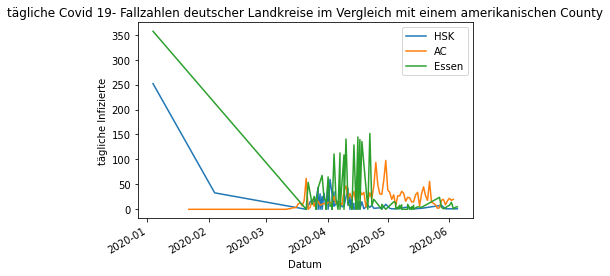

In [19]:
ax = plt.gca()
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
countyAC.plot(kind='line', x = 'date', y= 'dailycases', ax=ax, label="AC")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="Essen")
ax.set_title('tägliche Covid 19- Fallzahlen deutscher Landkreise im Vergleich mit einem amerikanischen County')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Infizierte')

plt.show()

Man kann sehen, dass die Daten erst ab mitte März wirklich brauchbar sind, da vorher der Virus auch noch nicht in den westlichen Staaten vorhanden war

Text(0, 0.5, 'tägliche Todeszahlen deutscher Landkreise')

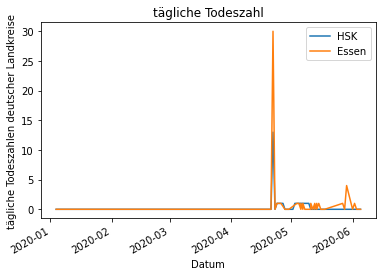

In [20]:
ax = plt.gca()
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="HSK")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="Essen")

ax.set_title('tägliche Todeszahl')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Todeszahlen deutscher Landkreise')

Text(0.5, 1.0, 'Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')

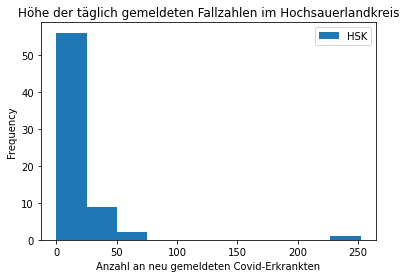

In [21]:
ax = plt.gca()

d['Hochsauerlandkreis'].plot(kind='hist', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
ax.set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten')
ax.set_title('Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')

Zeigt an dass die meisten täglichen Meldungen Meldungen mit zwischen 0 und 25 neue Infizierten hatten
Hat nicht so geklappt wie es sollte (Sollte zsmhang zwischen gemeldeten Wochentag und der höhe der Infektionszahlen zeigen)

2020-10-30 00:18:20 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-10-30 00:18:20 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-10-30 00:18:20 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-10-30 00:18:20 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


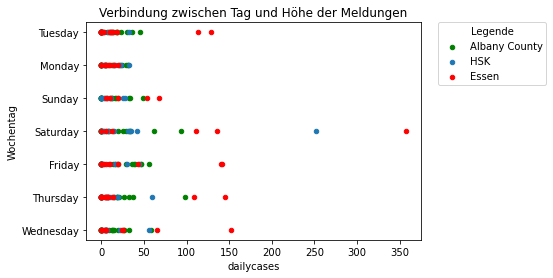

In [22]:
ax = plt.gca()
countyAC.plot(kind='scatter', x = 'dailycases', y= 'Weekday', ax=ax, label="Albany County", color = 'green')
d['Hochsauerlandkreis'].plot(kind='scatter', x = 'dailycases', y= 'Wochentag', ax=ax, label="HSK")
d['Essen'].plot(kind='scatter', x = 'dailycases', y= 'Wochentag', ax=ax, label="Essen", color = 'red')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Legende") 
_=ax.set_title('Verbindung zwischen Tag und Höhe der Meldungen')

Zeigt das an was eigentlich das Histogramm nachweisen sollte. Man sieht dass kein Zusammenhang zwischen dem Wochentag und der höhe der Meldung besteht

In [23]:
import geopandas as gpd
bundesland_capital = pd.read_csv('bundcap.csv')
bundesland_capital = gpd.GeoDataFrame(bundesland_capital, geometry=gpd.points_from_xy(bundesland_capital.Longitude, bundesland_capital.Latitude))
bundesland_capitalname = bundesland_capital 

2020-10-30 00:18:22 [fiona.env] DEBUG: Entering env context: <fiona.env.Env object at 0x000001FC55263B88>
2020-10-30 00:18:22 [fiona.env] DEBUG: Starting outermost env
2020-10-30 00:18:22 [fiona.env] DEBUG: No GDAL environment exists
2020-10-30 00:18:22 [fiona.env] DEBUG: New GDAL environment <fiona._env.GDALEnv object at 0x000001FC552631C8> created
2020-10-30 00:18:22 [fiona._env] DEBUG: Logging error handler pushed.
2020-10-30 00:18:22 [fiona._env] DEBUG: All drivers registered.
2020-10-30 00:18:22 [fiona._env] DEBUG: GDAL_DATA found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\gdal'.
2020-10-30 00:18:22 [fiona._env] DEBUG: PROJ_LIB found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\proj'.
2020-10-30 00:18:22 [fiona._env] DEBUG: Started GDALEnv <fiona._env.GDALEnv object at 0x000001FC552631C8>.
2020-10-30 00:18:22 [fiona.env] DEBUG: Updated existing <fiona._env.GDALEnv object at 0x000001FC552631C8> with options

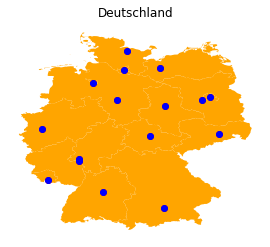

In [24]:
germap = gpd.read_file('geomap/vg2500_bld.shp')
ax = germap.plot(color='orange')

ax = bundesland_capital.plot(ax=ax, color='red')
ax = bundesland_capitalname.plot(ax=ax, color='blue') #Damit sollen eigentlich die Städtenamen angezeigt werden und keine blauen Punke


plt.rcParams['figure.figsize'] = [21, 9]
ax.set_title('Deutschland')
ax.set_axis_off()

plt.show()

Wurde nur für Tests genutzt, wird wahrscheinlich am Ende wieder gelöscht

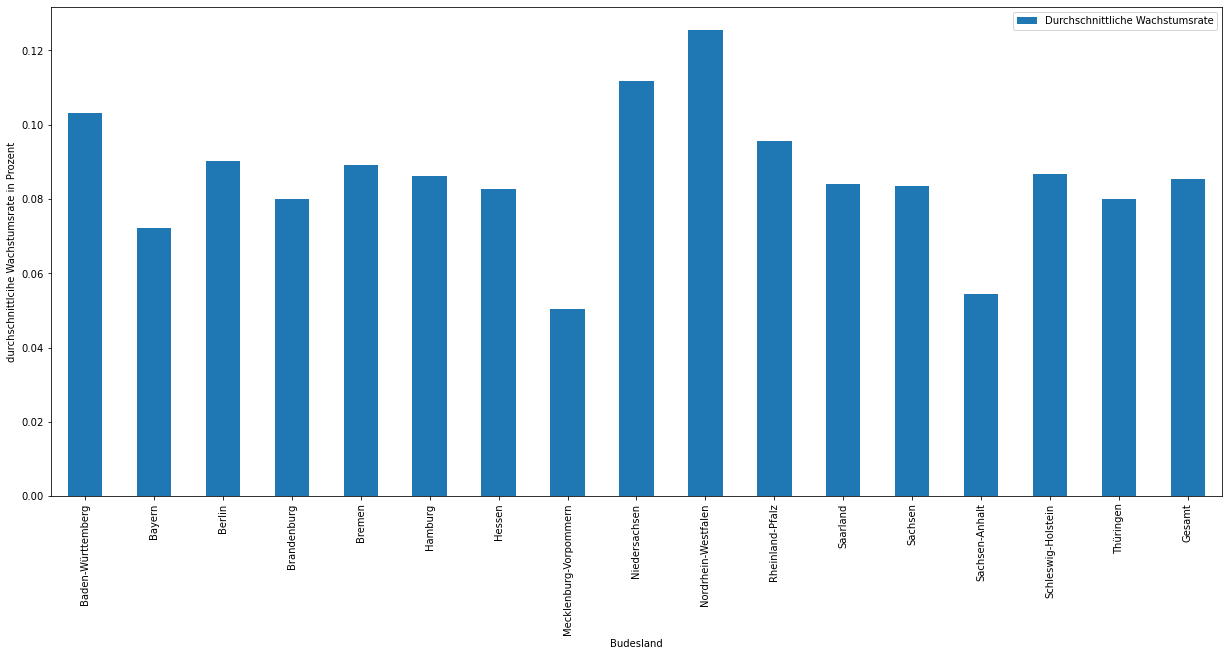

In [25]:
bars = durchwachstumfnl.plot.bar(x = 'Bundesland', y = 'AGR',label='Durchschnittliche Wachstumsrate',xlabel='Budesland',ylabel='durchschnittlcihe Wachstumsrate in Prozent');

2020-10-30 00:18:25 [fiona.env] DEBUG: Entering env context: <fiona.env.Env object at 0x000001FC553DCD48>
2020-10-30 00:18:25 [fiona.env] DEBUG: Starting outermost env
2020-10-30 00:18:25 [fiona.env] DEBUG: No GDAL environment exists
2020-10-30 00:18:25 [fiona.env] DEBUG: New GDAL environment <fiona._env.GDALEnv object at 0x000001FC55401E88> created
2020-10-30 00:18:25 [fiona._env] DEBUG: Logging error handler pushed.
2020-10-30 00:18:25 [fiona._env] DEBUG: All drivers registered.
2020-10-30 00:18:25 [fiona._env] DEBUG: GDAL_DATA found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\gdal'.
2020-10-30 00:18:25 [fiona._env] DEBUG: PROJ_LIB found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\proj'.
2020-10-30 00:18:25 [fiona._env] DEBUG: Started GDALEnv <fiona._env.GDALEnv object at 0x000001FC55401E88>.
2020-10-30 00:18:25 [fiona.env] DEBUG: Updated existing <fiona._env.GDALEnv object at 0x000001FC55401E88> with options

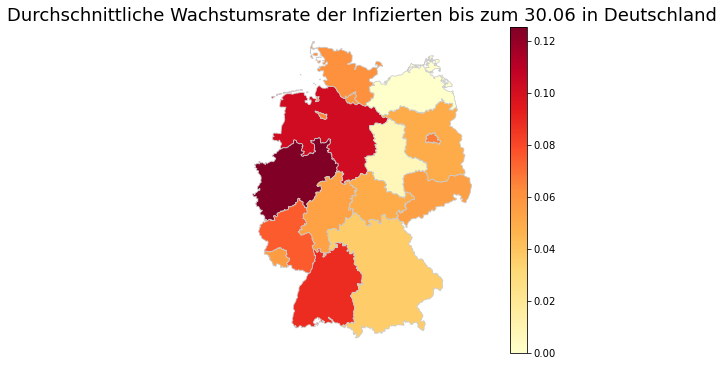

In [26]:
DEmap = gpd.read_file("geomap/vg2500_bld.shp")

merged = DEmap.set_index('GEN').join(durchwachstumfnl.set_index('Bundesland'))

column = durchwachstumfnl['AGR']
max_Wachstum = column.max()
vmin, vmax = 0, max_Wachstum
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

# Erstellung der Deutschlandkarte
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='AGR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Entfernt die x und y Achse
ax.axis('off')

ax.set_title('Durchschnittliche Wachstumsrate der Infizierten bis zum 30.06 in Deutschland', fontdict={'fontsize': '18','fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In dieser Deutschlandkarte ist die durchschnittliche tägliche Wachstumsrate der Infizierten in Deutschland für jedes Bundesland visualisiert dargestellt. Man kann sehen, dass die meisten Bundesländer eine geringe Wachstumsrate haben, jedoch NRW eine sehr hohe.

In [15]:
import statsmodels.formula.api as smf

lm = smf.ols('AGR ~ Dichte',data = compLKfnl).fit()
lm.params
trend = pd.DataFrame({'Dichte': [compLKfnl.Dichte.min(), compLKfnl.Dichte.max()]})
lm.predict(trend)
preds = lm.predict(trend)

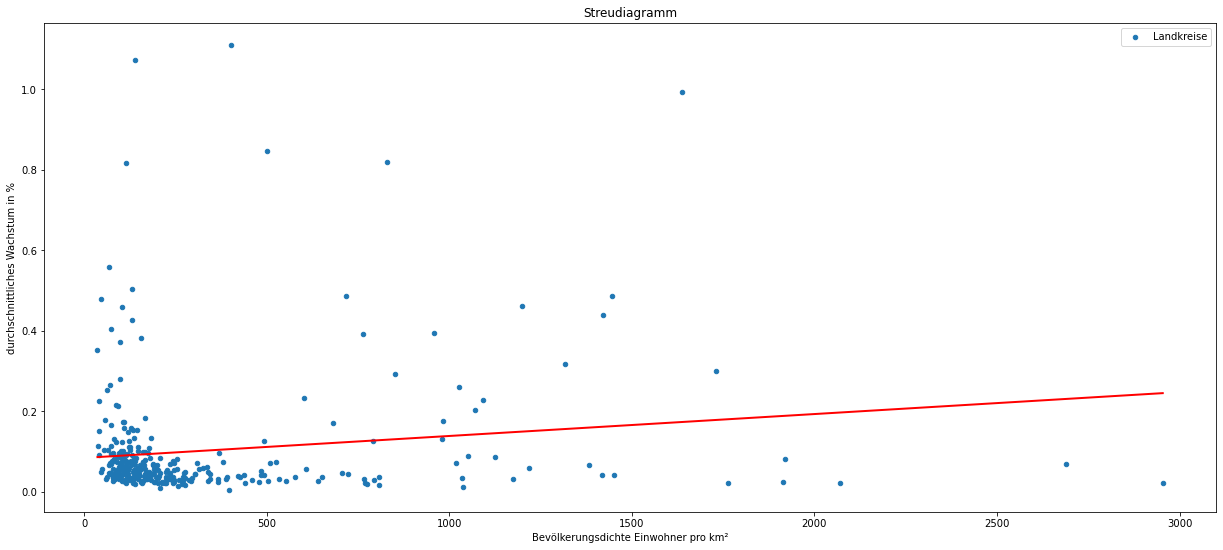

In [27]:
ax = plt.gca()
compLK.plot(kind='scatter', x = 'Bev.D.Ew./km²', y= 'AGR', ax=ax, label="Landkreise")

#Trendlinie erstellen
#z = np.polyfit(compLK['Bev.D.Ew./km²'], compLK['AGR'], 1)
#p = np.poly1d(z)
#plt.plot(compLK['Bev.D.Ew./km²'],p(compLK['Bev.D.Ew./km²']),"r")

plt.plot(X_new, preds, c='red', linewidth=2)

ax.set_title('Streudiagramm')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [28]:
lm.params

Intercept    0.083846
Dichte       0.000054
dtype: float64

In diesem Scatterplot kann man Mithilfe der Trendlinie sehen, dass es einen Zusammenhang zwischen der Bevölkerungsdichte und der durchschnittlichen Wachstumsrate der Coronainfizierungen gibt. Je höher die Bevölkerungsdichte, desto höher ist auch der durchschnittliche Wachstums. Bei einer x höheren Bevölerungsdichte würde das durchschnittliche Wachstum um 0.083846 + 0.000054x steigen.

In [29]:
durchwachstumfnl.describe()

,AGR
count,17.000000
mean,0.085912
std,0.017991
min,0.050346
25%,0.080068
50%,0.085409
75%,0.090253
max,0.125420


In [30]:
compLK.describe()

,AGR,Bev.D.Ew./km²
count,322.000000,322.000000
mean,0.101062,316.279503
std,0.150634,409.852275
min,0.005169,36.000000
25%,0.035155,106.000000
50%,0.053439,160.000000
75%,0.090738,301.750000
max,1.109792,2954.000000


In [31]:
d['Hochsauerlandkreis'].describe()

,cases,cases_per_100k,deaths,deaths_per_100k,täglicher Wachstum,dailycases,Rate,kumcases,dailydeaths,kumdeaths
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,413.058824,158.579060,4.485294,1.721966,0.017012,14.264706,0.020850,710.411765,0.264706,4.558824
std,160.697257,61.693931,7.306698,2.805142,0.116643,32.436674,0.107090,232.711226,1.589308,7.438067
min,109.000000,41.846600,0.000000,0.000000,-0.617544,0.000000,-0.617544,252.000000,0.000000,0.000000
25%,252.750000,97.034225,0.000000,0.000000,0.001647,1.000000,0.001670,482.000000,0.000000,0.000000
50%,449.000000,172.377400,0.000000,0.000000,0.010620,5.500000,0.012739,783.000000,0.000000,0.000000
75%,560.500000,215.183775,13.250000,5.086875,0.034457,15.250000,0.044865,921.500000,0.000000,13.250000
max,609.000000,233.803600,18.000000,6.910500,0.316547,252.000000,0.244604,970.000000,13.000000,18.000000


In [32]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(compLKfnl)
y_km = km.predict(compLKfnl)

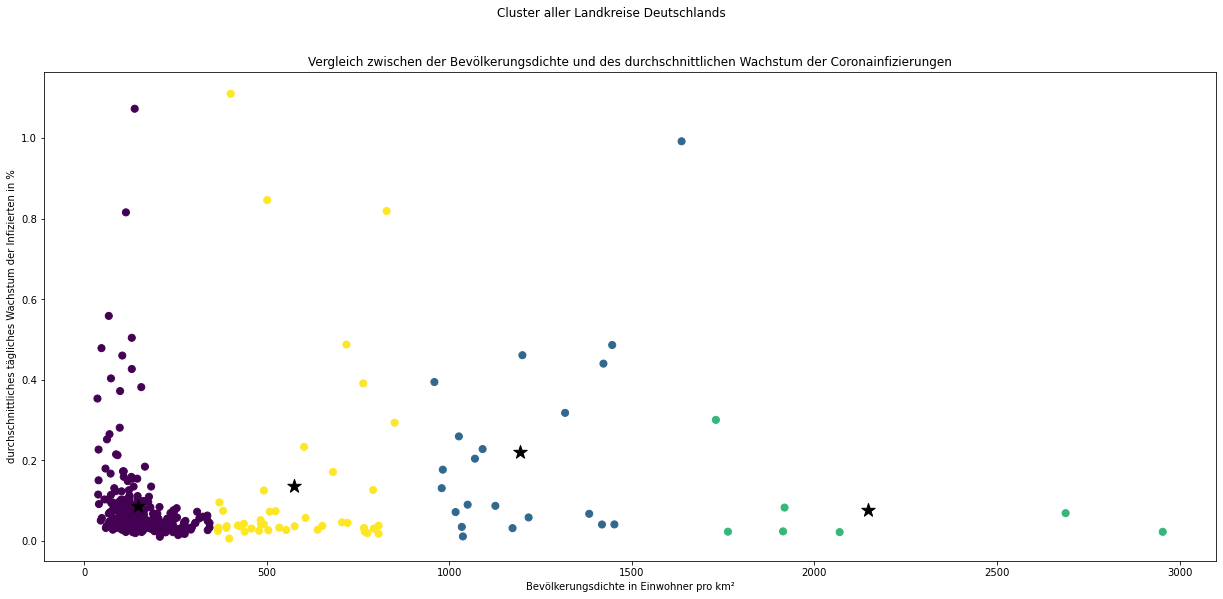

In [33]:
plt.scatter(compLKfnl["Dichte"], compLKfnl['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='*',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Coronainfizierungen")
plt.suptitle("Cluster aller Landkreise Deutschlands")
plt.ylabel("durchschnittliches tägliches Wachstum der Infizierten in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')

Cluster des zuvor erstellen Streudiagramms mit 4 Centers